In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_excel('1440min.xlsx',index_col=[0], parse_dates=[0]) # We set the index column and know it has dates

In [0]:
data.head()

,y
ds,
2020-04-17,23703
2020-04-16,24294
2020-04-15,24365
2020-04-14,22691
2020-04-13,16072


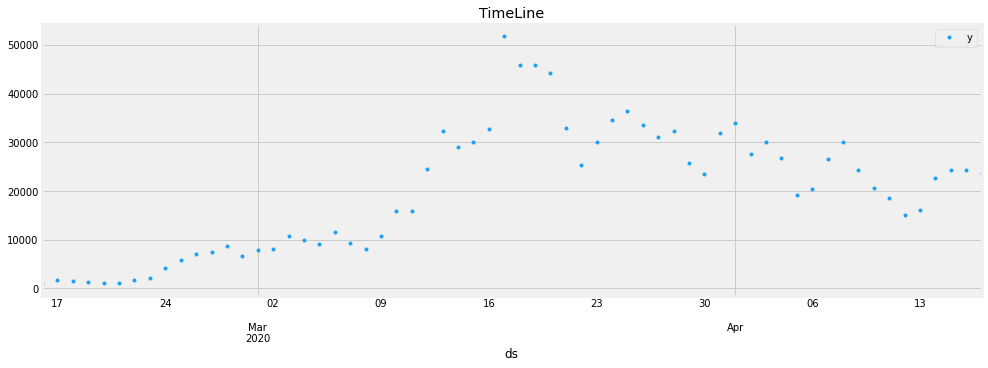

In [0]:
data.plot(style='.', figsize=(15,5), color=["#1DA1F2"], title='TimeLine')
plt.show()

In [0]:
def create_features(df, label=None):

    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['dayofmonth'] = df['date'].dt.day
    
    X = df[['hour','dayofweek','dayofmonth']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(data, label='y')

features_and_target = pd.concat([X, y], axis=1)

In [0]:
features_and_target.head()

,hour,dayofweek,dayofmonth,y
ds,,,,
2020-04-17,0,4,17,23703
2020-04-16,0,3,16,24294
2020-04-15,0,2,15,24365
2020-04-14,0,1,14,22691
2020-04-13,0,0,13,16072


In [0]:
split_date = '31-mar-2020'
data_train = data.loc[data.index <= split_date].copy()
data_test = data.loc[data.index > split_date].copy()

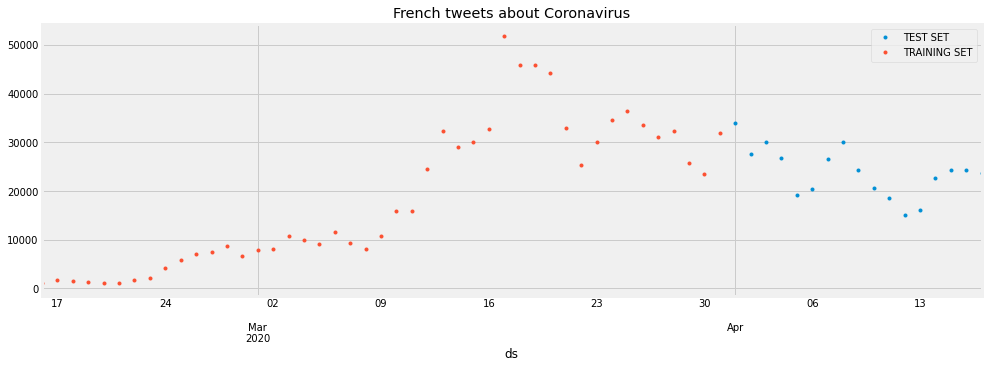

In [0]:
# Plot train and test so you can see where we have split
data_test.rename(columns={'y': 'TEST SET'}).join(data_train.rename(columns={'y': 'TRAINING SET'}),how='outer').plot(figsize=(15,5), title='French tweets about Coronavirus', style='.')
plt.show()

In [0]:
# Format data for prophet model using ds and y
data_train.head()

,y
ds,
2020-03-31,31887
2020-03-30,23413
2020-03-29,25657
2020-03-28,32389
2020-03-27,31107


In [0]:
# Setup and train model and fit
model = Prophet()
model.fit(data_train.reset_index())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
data_test_fcst = model.predict(df=data_test.reset_index())

In [0]:
data_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-04-01,40833.052916,33056.365206,52146.077130,40833.032264,40833.075598,2024.401453,2024.401453,2024.401453,2024.401453,2024.401453,2024.401453,0.0,0.0,0.0,42857.454368
1,2020-04-02,41787.996225,34820.457794,52620.748013,41787.898054,41788.086983,1910.838706,1910.838706,1910.838706,1910.838706,1910.838706,1910.838706,0.0,0.0,0.0,43698.834931
2,2020-04-03,42742.939535,35012.609567,54559.439403,42742.721258,42743.119484,2170.231166,2170.231166,2170.231166,2170.231166,2170.231166,2170.231166,0.0,0.0,0.0,44913.170701
3,2020-04-04,43697.882844,32147.217141,51536.722418,43697.526677,43698.177134,-1576.940851,-1576.940851,-1576.940851,-1576.940851,-1576.940851,-1576.940851,0.0,0.0,0.0,42120.941993
4,2020-04-05,44652.826154,32096.241406,50088.365332,44652.290217,44653.273364,-3544.633298,-3544.633298,-3544.633298,-3544.633298,-3544.633298,-3544.633298,0.0,0.0,0.0,41108.192856


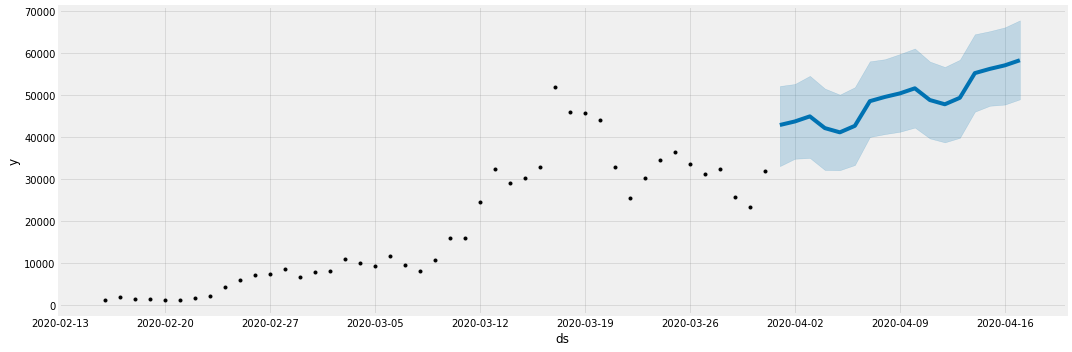

In [0]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(data_test_fcst,
                 ax=ax)
plt.show()

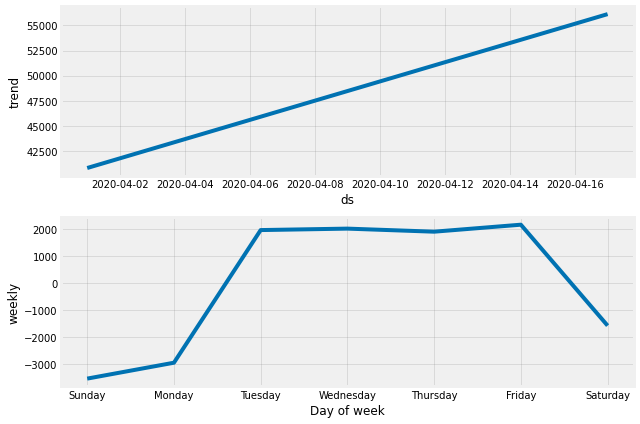

In [0]:
# Plot the components of the model
fig = model.plot_components(data_test_fcst)

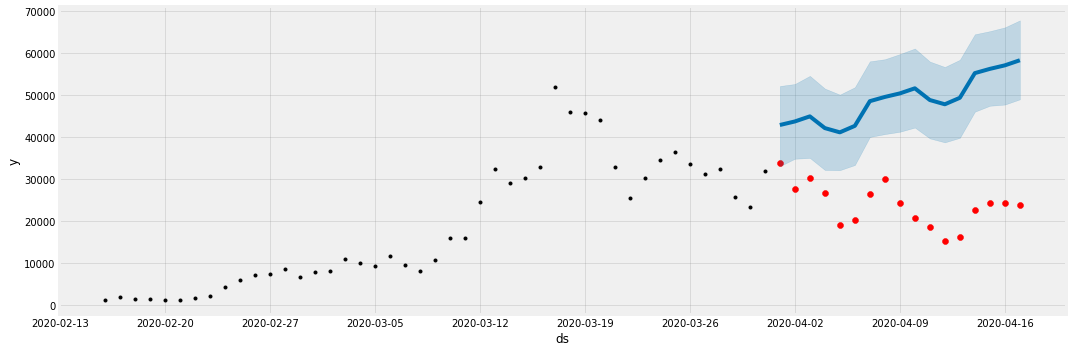

In [0]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(data_test.index, data_test['y'], color='r')
fig = model.plot(data_test_fcst, ax=ax)

In [0]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MSE = mean_squared_error(y_true=data_test['y'],
y_pred=data_test_fcst['yhat'])
MAE = mean_absolute_error(y_true=data_test['y'],
y_pred=data_test_fcst['yhat'])
MAEP = mean_absolute_percentage_error(y_true=data_test['y'],y_pred=data_test_fcst['yhat'])


print ('MSE :',MSE)
print ('MAE :',MAE)
print ('MAEP', MAEP, '%')

MSE : 642764164.886721
MAE : 25059.274175712362
MAEP 111.6817512762191 %


In [0]:
mean_absolute_error(y_true=data_test['y'],y_pred=data_test_fcst['yhat'])

25059.274175712362

In [0]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

mean_absolute_percentage_error(y_true=data_test['y'],y_pred=data_test_fcst['yhat'])

1.2026928932160033

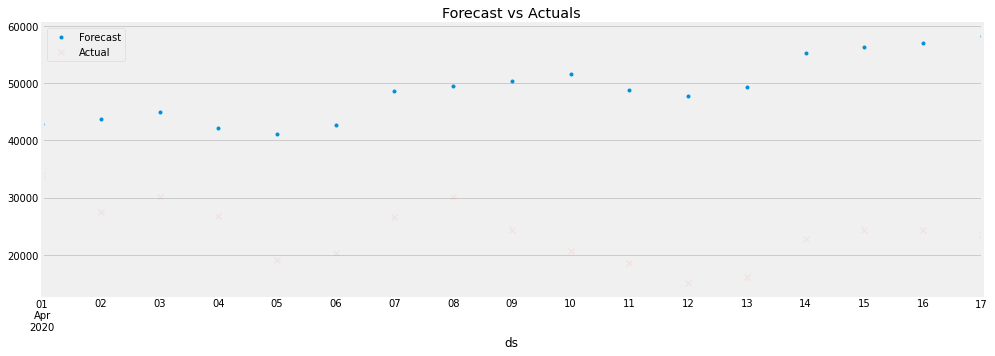

In [0]:
ax = data_test_fcst.set_index('ds')['yhat'].plot(figsize=(15, 5), lw=0, style='.')
data_test['y'].plot(ax=ax, style='x', lw=3, alpha=0.1)
plt.legend(['Forecast','Actual'])
plt.title('Forecast vs Actuals')
plt.show()

Data Cleaning¶
**bold text**

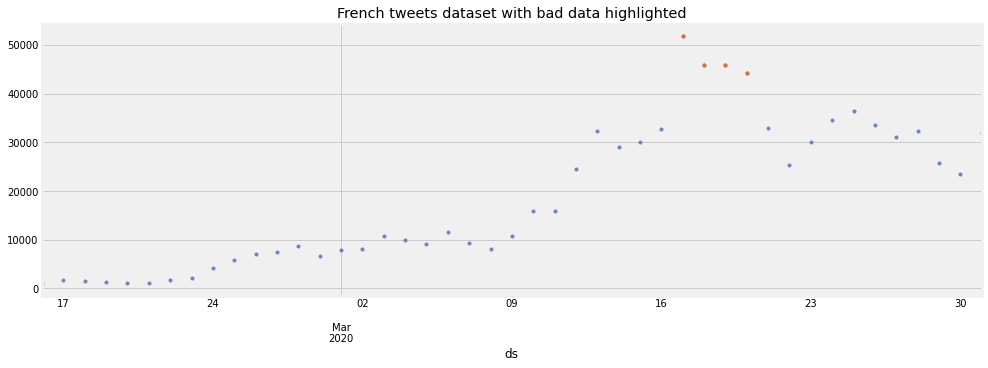

In [0]:
ax = data_train.plot(style='.', figsize=(15,5), color=['#6387c2'],
                     title='French tweets dataset with bad data highlighted',
                     xlim=('03-9-2020','04-6-2020')
                    )
data_train.query('y > 40000').plot(style='.', figsize=(15,5), color=['#eb6b26'], ax=ax)
ax.legend().set_visible(False)
plt.show()

In [0]:
data_train = data_train.rename(columns = {'y':'freq'})
data_train.index.name = 'Datetime'
data_train.head()

,freq
Datetime,
2020-03-31,31887
2020-03-30,23413
2020-03-29,25657
2020-03-28,32389
2020-03-27,31107


In [0]:
# Clean Data
import numpy as np
data_train['data_clean'] = data_train['freq']
data_train.loc[data_train['freq'] > 40000, 'data_clean'] = np.nan

# Train model on clean data
model = Prophet()
model.fit(data_train.reset_index() \
              .rename(columns={'Datetime':'ds',
                               'data_clean':'y'})
         )
         

# Predict on training set with clean model
data_test_fcst_clean = model.predict(df=data_test.reset_index() \
                                   .rename(columns={'Datetime':'ds'}))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
mse_clean = mean_squared_error(y_true=data_test['y'],
                               y_pred=data_test_fcst_clean['yhat']
                              )
mae_clean = mean_absolute_error(y_true=data_test['y'],
                                y_pred=data_test_fcst_clean['yhat']
                               )
mape_clean = mean_absolute_percentage_error(y_true=data_test['y'],
                                            y_pred=data_test_fcst_clean['yhat']) 
print(f'Cleaned data model has MSE {mse_clean:0.4f} - MAE {mae_clean:0.4f} - MAPE {mape_clean:0.4f} %')

Cleaned data model has MSE 403540096.7412 - MAE 19715.0250 - MAPE 89.1449 %


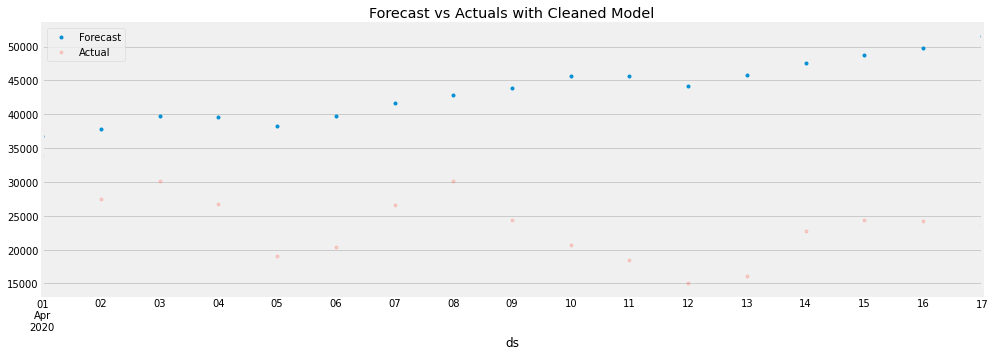

In [0]:
ax = data_test_fcst_clean.set_index('ds')['yhat'] \
    .plot(figsize=(15, 5), lw=0, style='.')
data_test['y'].plot(ax=ax, style='.', lw=0, alpha=0.2)
plt.legend(['Forecast','Actual'])
plt.title('Forecast vs Actuals with Cleaned Model')
plt.show()